<a href="https://colab.research.google.com/github/kenhuangsy/Stocks-Launch-Pad-Screener/blob/main/Launch_Pad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Launch Pad Screener

The main idea behind the launch pad is that if a stock's 10 day moving average, 21 day moving average, and 50 day moving average are really close together (3% difference at most between any of them), then it's likely that there is a change in trend.

## Install dependencies and Import

In [2]:
!pip install alpaca_trade_api
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 KB 13.9 MB/s eta 0:00:00
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.4
    Uninstalling msgpack-1.0.4:
      Successfully uninstalled msgpack-1.0.4
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.3
    Uninstalling aiohttp-3.8.3:
      Successfully uninstalled aiohttp-3.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 7.7 MB/s eta 0:00:00


In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2023-01-17 20:17:49--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-17 20:17:49--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-17 20:17:49--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.sour

In [3]:
import datetime, pandas
import mplfinance as mpf
from alpaca_trade_api.stream import Stream
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
from getpass import getpass

## Enter Alpaca API Key and Secret Key

In [4]:
API_KEY = getpass('Enter your API KEY: ')
SECRET_KEY = getpass('Enter your SECRET KEY: ')

Enter your API KEY: ··········
Enter your SECRET KEY: ··········


## Get Stock Data

In [26]:
api = REST(key_id=API_KEY, secret_key=SECRET_KEY, base_url="https://paper-api.alpaca.markets")

# SPY Symbols
SYMBOLS = ['MMM','AOS','ABT','ABBV','ABMD','ACN','ATVI','ADM','ADBE','ADP','AAP','AES','AFL','A','AIG','APD','AKAM','ALK','ALB','ARE','ALGN','ALLE','LNT','ALL','GOOGL','GOOG','MO','AMZN','AMCR','AMD','AEE','AAL','AEP','AXP','AMT','AWK','AMP','ABC','AME','AMGN','APH','ADI','ANSS','ANTM','AON','APA','AAPL','AMAT','APTV','ANET','AIZ','T','ATO','ADSK','AZO','AVB','AVY','BKR','BLL','BAC','BBWI','BAX','BDX','WRB','BRK.B','BBY','BIO','TECH','BIIB','BLK','BK','BA','BKNG','BWA','BXP','BSX','BMY','AVGO','BR','BRO','BF.B','CHRW','CDNS','CZR','CPT','CPB','COF','CAH','KMX','CCL','CARR','CTLT','CAT','CBOE','CBRE','CDW','CE','CNC','CNP','CDAY','CERN','CF','CRL','SCHW','CHTR','CVX','CMG','CB','CHD','CI','CINF','CTAS','CSCO','C','CFG','CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','COP','ED','STZ','CEG','COO','CPRT','GLW','CTVA','COST','CTRA','CCI','CSX','CMI','CVS','DHI','DHR','DRI','DVA','DE','DAL','XRAY','DVN','DXCM','FANG','DLR','DFS','DISH','DIS','DG','DLTR','D','DPZ','DOV','DOW','DTE','DUK','DRE','DD','DXC','EMN','ETN','EBAY','ECL','EIX','EW','EA','EMR','ENPH','ETR','EOG','EPAM','EFX','EQIX','EQR','ESS','EL','ETSY','RE','EVRG','ES','EXC','EXPE','EXPD','EXR','XOM','FFIV','FDS','FAST','FRT','FDX','FITB','FRC','FE','FIS','FISV','FLT','FMC','F','FTNT','FTV','FBHS','FOXA','FOX','BEN','FCX','AJG','GRMN','IT','GE','GNRC','GD','GIS','GPC','GILD','GL','GPN','GM','GS','GWW','HAL','HIG','HAS','HCA','PEAK','HSIC','HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HWM','HPQ','HUM','HII','HBAN','IEX','IDXX','ITW','ILMN','INCY','IR','INTC','ICE','IBM','IP','IPG','IFF','INTU','ISRG','IVZ','IPGP','IQV','IRM','JBHT','JKHY','J','JNJ','JCI','JPM','JNPR','K','KEY','KEYS','KMB','KIM','KMI','KLAC','KHC','KR','LHX','LH','LRCX','LW','LVS','LDOS','LEN','LLY','LNC','LIN','LYV','LKQ','LMT','L','LOW','LUMN','LYB','MTB','MRO','MPC','MKTX','MAR','MMC','MLM','MAS','MA','MTCH','MKC','MCD','MCK','MDT','MRK','FB','MET','MTD','MGM','MCHP','MU','MSFT','MAA','MRNA','MHK','MOH','TAP','MDLZ','MPWR','MNST','MCO','MS','MOS','MSI','MSCI','NDAQ','NTAP','NFLX','NWL','NEM','NWSA','NWS','NEE','NLSN','NKE','NI','NDSN','NSC','NTRS','NOC','NLOK','NCLH','NRG','NUE','NVDA','NVR','NXPI','ORLY','OXY','ODFL','OMC','OKE','ORCL','OGN','OTIS','PCAR','PKG','PARA','PH','PAYX','PAYC','PYPL','PENN','PNR','PEP','PKI','PFE','PM','PSX','PNW','PXD','PNC','POOL','PPG','PPL','PFG','PG','PGR','PLD','PRU','PEG','PTC','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RL','RJF','RTX','O','REG','REGN','RF','RSG','RMD','RHI','ROK','ROL','ROP','ROST','RCL','SPGI','CRM','SBAC','SLB','STX','SEE','SRE','NOW','SHW','SBNY','SPG','SWKS','SJM','SNA','SEDG','SO','LUV','SWK','SBUX','STT','STE','SYK','SIVB','SYF','SNPS','SYY','TMUS','TROW','TTWO','TPR','TGT','TEL','TDY','TFX','TER','TSLA','TXN','TXT','TMO','TJX','TSCO','TT','TDG','TRV','TRMB','TFC','TWTR','TYL','TSN','USB','UDR','ULTA','UAA','UA','UNP','UAL','UNH','UPS','URI','UHS','VLO','VTR','VRSN','VRSK','VZ','VRTX','VFC','VTRS','V','VNO','VMC','WAB','WMT','WBA','WBD','WM','WAT','WEC','WFC','WELL','WST','WDC','WRK','WY','WHR','WMB','WTW','WYNN','XEL','XYL','YUM','ZBRA','ZBH','ZION','ZTS']

# Let's say a week
upper = datetime.date(2023, 1, 13)
lower = datetime.date(2023, 1, 6)

bars = api.get_bars(SYMBOLS, TimeFrame.Day, lower.isoformat(), upper.isoformat()).df
bars

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-01-06 05:00:00+00:00,154.36,154.64,143.0100,147.67,2440484,46668,146.516335,A
2023-01-09 05:00:00+00:00,149.69,151.28,147.1980,147.47,1269575,29085,148.404347,A
2023-01-10 05:00:00+00:00,150.18,155.55,148.7500,155.23,1565753,29448,154.271944,A
2023-01-11 05:00:00+00:00,155.23,158.58,155.2300,158.17,1241899,29621,157.514398,A
2023-01-12 05:00:00+00:00,158.16,158.60,155.5825,156.49,809123,16786,156.975313,A
...,...,...,...,...,...,...,...,...
2023-01-09 05:00:00+00:00,149.00,149.52,147.0000,147.06,1700689,29777,147.924750,ZTS
2023-01-10 05:00:00+00:00,147.11,154.69,147.1100,154.36,2639190,43033,153.136773,ZTS
2023-01-11 05:00:00+00:00,156.00,158.56,154.9300,157.90,3270862,54066,157.489212,ZTS


### Get the moving average data

In [27]:
bars['10DayMA'] = talib.SMA(bars['close'], 10)
bars

,open,high,low,close,volume,trade_count,vwap,symbol,10DayMA
timestamp,,,,,,,,,
2023-01-06 05:00:00+00:00,154.36,154.64,143.0100,147.67,2440484,46668,146.516335,A,NaN
2023-01-09 05:00:00+00:00,149.69,151.28,147.1980,147.47,1269575,29085,148.404347,A,NaN
2023-01-10 05:00:00+00:00,150.18,155.55,148.7500,155.23,1565753,29448,154.271944,A,NaN
2023-01-11 05:00:00+00:00,155.23,158.58,155.2300,158.17,1241899,29621,157.514398,A,NaN
2023-01-12 05:00:00+00:00,158.16,158.60,155.5825,156.49,809123,16786,156.975313,A,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-09 05:00:00+00:00,149.00,149.52,147.0000,147.06,1700689,29777,147.924750,ZTS,118.889
2023-01-10 05:00:00+00:00,147.11,154.69,147.1100,154.36,2639190,43033,153.136773,ZTS,105.025
2023-01-11 05:00:00+00:00,156.00,158.56,154.9300,157.90,3270862,54066,157.489212,ZTS,91.445


In [28]:
bars['21DayMA'] = talib.SMA(bars['close'], 21)
bars

,open,high,low,close,volume,trade_count,vwap,symbol,10DayMA,21DayMA
timestamp,,,,,,,,,,
2023-01-06 05:00:00+00:00,154.36,154.64,143.0100,147.67,2440484,46668,146.516335,A,NaN,NaN
2023-01-09 05:00:00+00:00,149.69,151.28,147.1980,147.47,1269575,29085,148.404347,A,NaN,NaN
2023-01-10 05:00:00+00:00,150.18,155.55,148.7500,155.23,1565753,29448,154.271944,A,NaN,NaN
2023-01-11 05:00:00+00:00,155.23,158.58,155.2300,158.17,1241899,29621,157.514398,A,NaN,NaN
2023-01-12 05:00:00+00:00,158.16,158.60,155.5825,156.49,809123,16786,156.975313,A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-09 05:00:00+00:00,149.00,149.52,147.0000,147.06,1700689,29777,147.924750,ZTS,118.889,152.699524
2023-01-10 05:00:00+00:00,147.11,154.69,147.1100,154.36,2639190,43033,153.136773,ZTS,105.025,153.849048
2023-01-11 05:00:00+00:00,156.00,158.56,154.9300,157.90,3270862,54066,157.489212,ZTS,91.445,155.382381


In [29]:
bars['50DayMA'] = talib.SMA(bars['close'], 50)
bars

,open,high,low,close,volume,trade_count,vwap,symbol,10DayMA,21DayMA,50DayMA
timestamp,,,,,,,,,,,
2023-01-06 05:00:00+00:00,154.36,154.64,143.0100,147.67,2440484,46668,146.516335,A,NaN,NaN,NaN
2023-01-09 05:00:00+00:00,149.69,151.28,147.1980,147.47,1269575,29085,148.404347,A,NaN,NaN,NaN
2023-01-10 05:00:00+00:00,150.18,155.55,148.7500,155.23,1565753,29448,154.271944,A,NaN,NaN,NaN
2023-01-11 05:00:00+00:00,155.23,158.58,155.2300,158.17,1241899,29621,157.514398,A,NaN,NaN,NaN
2023-01-12 05:00:00+00:00,158.16,158.60,155.5825,156.49,809123,16786,156.975313,A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09 05:00:00+00:00,149.00,149.52,147.0000,147.06,1700689,29777,147.924750,ZTS,118.889,152.699524,116.8842
2023-01-10 05:00:00+00:00,147.11,154.69,147.1100,154.36,2639190,43033,153.136773,ZTS,105.025,153.849048,118.5456
2023-01-11 05:00:00+00:00,156.00,158.56,154.9300,157.90,3270862,54066,157.489212,ZTS,91.445,155.382381,120.2640


### Clean the data

In [30]:
bars = bars.dropna()

In [31]:
bars

,open,high,low,close,volume,trade_count,vwap,symbol,10DayMA,21DayMA,50DayMA
timestamp,,,,,,,,,,,
2023-01-09 05:00:00+00:00,338.900,349.455,338.420,341.98,3133891,71731,343.984461,ADBE,256.455,198.197143,153.6282
2023-01-10 05:00:00+00:00,337.650,344.630,336.800,338.70,1670300,44730,339.201659,ADBE,279.189,207.011429,157.4488
2023-01-11 05:00:00+00:00,337.390,343.190,333.470,342.93,2344771,53820,340.081927,ADBE,302.131,215.450476,161.3580
2023-01-12 05:00:00+00:00,344.165,346.440,337.370,344.54,2121831,48819,343.524556,ADBE,309.664,224.001429,165.1442
2023-01-13 05:00:00+00:00,340.250,344.650,335.500,344.38,2581906,56683,341.566245,ADBE,316.727,232.435714,168.8684
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09 05:00:00+00:00,149.000,149.520,147.000,147.06,1700689,29777,147.924750,ZTS,118.889,152.699524,116.8842
2023-01-10 05:00:00+00:00,147.110,154.690,147.110,154.36,2639190,43033,153.136773,ZTS,105.025,153.849048,118.5456
2023-01-11 05:00:00+00:00,156.000,158.560,154.930,157.90,3270862,54066,157.489212,ZTS,91.445,155.382381,120.2640


## Filter stocks where the 10 day moving average, 21 day moving average, and 50 day moving average are close together (3% max difference for any of them)

In [32]:
bars = bars[(abs(bars['10DayMA'] - bars['21DayMA']) / bars['10DayMA'] <= 0.03) &
        (abs(bars['10DayMA'] - bars['50DayMA']) / bars['10DayMA'] <= 0.03) &
        (abs(bars['21DayMA'] - bars['50DayMA']) / bars['21DayMA'] <= 0.03)]
bars

,open,high,low,close,volume,trade_count,vwap,symbol,10DayMA,21DayMA,50DayMA
timestamp,,,,,,,,,,,
2023-01-10 05:00:00+00:00,29.360,30.0300,29.30,29.98,3472678,12059,29.933543,FOX,105.788,105.901429,106.6028
2023-01-13 05:00:00+00:00,130.930,134.2500,128.12,133.77,1292391,25067,130.997776,PKI,133.996,135.446190,133.0092
2023-01-13 05:00:00+00:00,78.525,79.8090,78.03,79.48,8619587,98817,79.140370,PYPL,141.021,141.896667,139.6098
2023-01-06 05:00:00+00:00,229.460,237.2075,228.11,235.80,1393723,27590,234.142587,SHW,148.475,145.463333,149.0244
2023-01-13 05:00:00+00:00,247.090,249.7700,246.13,248.81,235481,8271,248.628189,SNA,169.477,167.430952,170.4434
2023-01-06 05:00:00+00:00,70.620,72.0500,70.62,71.85,1082623,20029,71.562372,TXT,145.268,141.786190,143.8956
2023-01-09 05:00:00+00:00,72.150,72.3400,70.30,70.51,896908,13510,71.015246,TXT,141.793,142.056667,144.2156


## Visualize 

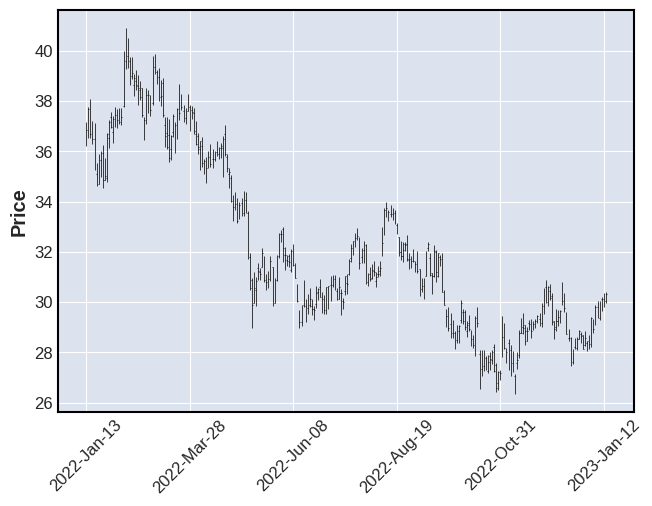

In [33]:
FOX = api.get_bars('FOX', TimeFrame.Day, '2022-01-13', '2023-01-13').df
mpf.plot(FOX)

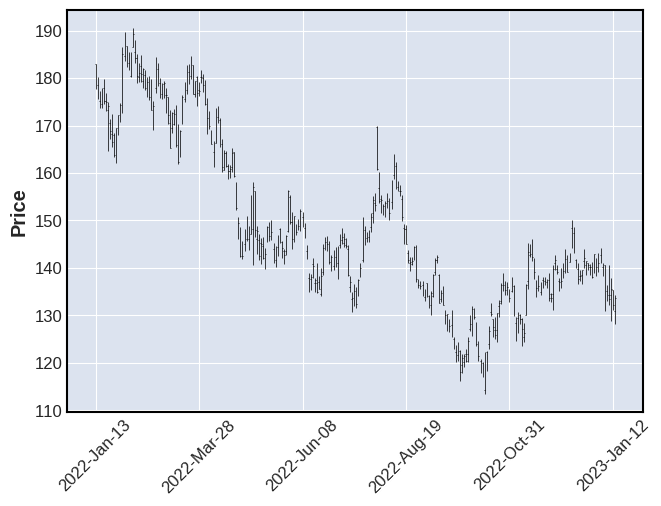

In [34]:
PKI = api.get_bars('PKI', TimeFrame.Day, '2022-01-13', '2023-01-13').df
mpf.plot(PKI)

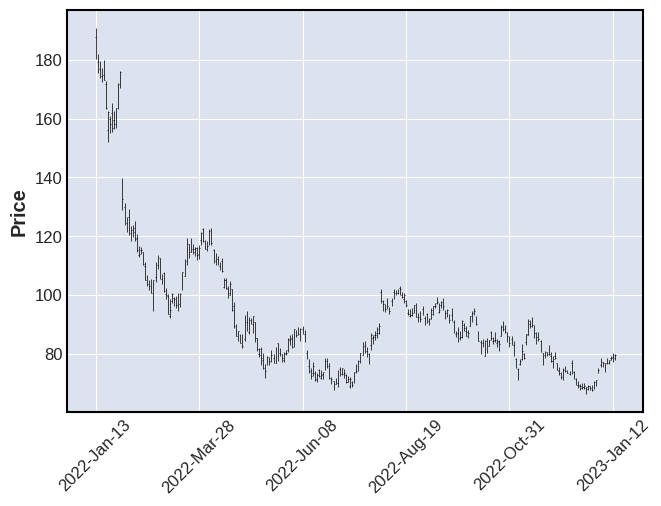

In [35]:
PYPL = api.get_bars('PYPL', TimeFrame.Day, '2022-01-13', '2023-01-13').df
mpf.plot(PYPL)

## Conclusion

Our visualized group of stocks confirms the effectiveness of this screener in identifying stocks where a change in trend has occurred.